In [6]:
import pandas as pd 
import pickle 
import numpy as np
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/ucom/Desktop/train.csv")
df.shape
del df['id']
del df['f_27'] #deleting the irrelevent column
df.head(6)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,-217.211798,0,1,1
5,1.349785,1.100418,0.562612,-0.607076,1.264728,0.283515,-1.131953,6,2,4,...,0.463936,-2.259781,-1.308329,-2.216110,1.016892,0.273792,45.890998,0,1,0


[0.03178295 0.03188138 0.03185744 0.02862228 0.02874691 0.02984212
 0.02878631 0.03570119 0.02895119 0.03100979 0.02795131 0.02948943
 0.03205958 0.02621637 0.02967225 0.03096415 0.02721757 0.02979387
 0.02771149 0.04247895 0.03674249 0.04885554 0.04031532 0.03979837
 0.04722631 0.04243355 0.05020951 0.036178   0.01159083 0.03591354]


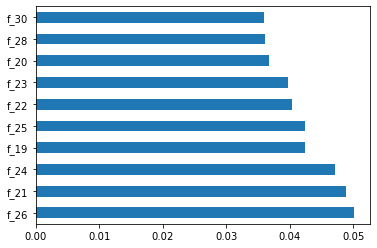

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = df.drop(columns=['target'])
y = df['target']
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
newdf = df[["f_22","f_25","f_19","f_24","f_21","f_26","target"]]
newdf.head(6)

,f_22,f_25,f_19,f_24,f_21,f_26,target
0,-2.540739,-0.208177,0.298218,-2.730628,3.058541,1.363402,0
1,2.278315,-3.782194,-3.147667,-1.217077,2.179050,-0.058316,1
2,-1.385775,2.788536,2.820733,-0.009121,-0.784235,-3.703488,1
3,0.572594,-2.533098,1.081084,1.686035,-2.343819,-0.608601,1
4,-3.912929,-3.306784,-0.126179,2.127649,1.133665,4.371371,1
5,-2.259781,1.016892,0.998751,-2.216110,0.463936,0.273792,0


In [20]:
XTT = newdf.drop(columns=['target'])
yTT = newdf['target']
X_train, X_test, y_train, y_test = train_test_split(XTT, yTT, test_size=0.2)
modelKNN = KNeighborsClassifier(n_neighbors=16)
resultKNN = modelKNN.fit(X_train, y_train)
prediction_test = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, prediction_test)
print("KNN MODEL ACCURACY: ", accuracyKNN)

KNN MODEL ACCURACY:  0.6606666666666666


In [22]:
from sklearn.model_selection import cross_val_score
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
knn_mean = knn_scores.mean()
print("KNN MODEL MEAN: ",knn_mean)

KNN MODEL MEAN:  0.6355055555555557


In [23]:
dftest = pd.read_csv("C:/Users/ucom/Desktop/test.csv")
dftest.head(6)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2
5,900005,-1.403337,-0.867727,-2.557340,0.319702,1.784916,0.104167,-0.603412,2,3,...,1.719947,2.182098,-2.820676,-1.311447,2.364910,2.511971,BCBDBADODB,-278.119587,0,1


In [25]:
newtest = dftest[["f_22","f_25","f_19","f_24","f_21","f_26"]]
newtest.head(6)

,f_22,f_25,f_19,f_24,f_21,f_26
0,-1.193879,-1.966887,-1.128371,-2.427430,-1.006400,5.734205
1,0.149442,-0.725155,-4.424098,-2.848714,2.382405,3.194219
2,1.312277,0.585032,-1.523864,1.714005,-7.026098,0.066898
3,-3.939475,-1.003320,-1.404597,-2.364007,-0.594532,3.893099
4,-0.985736,1.210687,-1.968516,-3.557893,0.084906,1.861884
5,2.182098,2.364910,-1.684574,-1.311447,1.719947,2.511971


In [26]:
newCSV = dftest[['id']]
newCSV

,id
0,900000
1,900001
2,900002
3,900003
4,900004
...,...
699995,1599995
699996,1599996
699997,1599997
699998,1599998


In [27]:
predictionOnTest = modelKNN.predict(newtest)
predictionOnTest

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [28]:
newCSV['target'] = predictionOnTest 
newCSV

<ipython-input-28-adc14c8dce85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCSV['target'] = predictionOnTest


,id,target
0,900000,1
1,900001,1
2,900002,0
3,900003,0
4,900004,0
...,...,...
699995,1599995,0
699996,1599996,1
699997,1599997,1
699998,1599998,1


In [29]:
newCSV.to_csv('Output.csv')